In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import numpy as np
from matplotlib import pyplot as plt
import os
import pwlf
import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify
import os
from Poincare import *
from Poincare import Section
import math
from surface_dynamics.all import *

In [2]:
#Code from Sunrose
D = OrigamiDatabase()
q = D.query()
qlist = q.list()

def unit_hor_saddle(O):
    count = 0
    for vert in O.vertices():
        tup = vert.up_right_tuple()
        for i in tup:
            for vert2 in O.vertices():
                tup2 = vert2.up_right_tuple()
                if O.r()(i) in tup2:
                    return True
    return False

def is_unobstructed(O):
    cusp_reps = O.teichmueller_curve().cusp_representatives()
    for item in cusp_reps:
        if not unit_hor_saddle(item[0]):
            return False
    return True

def obstructed(n, **kwargs):
    obstructed = []
    count_obstructed = 0
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            count_obstructed+= item.teichmueller_curve().orbit_graph().num_verts()
    return (obstructed, count_obstructed)

In [3]:
def vectors(perm, length = 200):
    a = str(perm)
    h, v = a.split("\n")
    S = SymmetricGroup(len(h))
    T = translation_surfaces.origami(S(h), S(v))
    T = T.erase_marked_points()
    sc_list = T.saddle_connections(length)
    slopes_all = []
    for item in sc_list:
        vec = item.holonomy().n()
        direction = item.direction
        if vec not in slopes_all:
            if vec[0] >= -length/20 and vec[0] <= length/20:
                if vec[1] >= -length/20 and vec[1] <= length/20:
                    slopes_all.append(item.holonomy().n())         
    vecs = []
    for vec in slopes_all:
        item = np.array([[vec[0]],[vec[1]]])
        vecs.append(item)
    return vecs

In [4]:
def perms_list(n, **kwargs):
    obstructed = []
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            for perm in item.teichmueller_curve():
                obstructed.append(perm)
    return obstructed

In [5]:
permutations = perms_list(7)

No saddle vec for eigenvector [[1.        ]
 [2.11363636]]
No saddle vec for eigenvector [[1.        ]
 [1.28947368]]
No saddle vec for eigenvector [[1.   ]
 [1.345]]
4514
124
No saddle vec for eigenvector [[1.  ]
 [0.54]]
No saddle vec for eigenvector [[ 1.        ]
 [-2.85185185]]
4464
122
No saddle vec for eigenvector [[1.        ]
 [0.37962963]]
No saddle vec for eigenvector [[1.        ]
 [2.17164179]]
No saddle vec for eigenvector [[ 1.        ]
 [-1.82758621]]
No saddle vec for eigenvector [[1.       ]
 [0.2238806]]
No saddle vec for eigenvector [[1.        ]
 [0.34508816]]
4596
124
No saddle vec for eigenvector [[1.        ]
 [0.26356589]]


KeyboardInterrupt: 

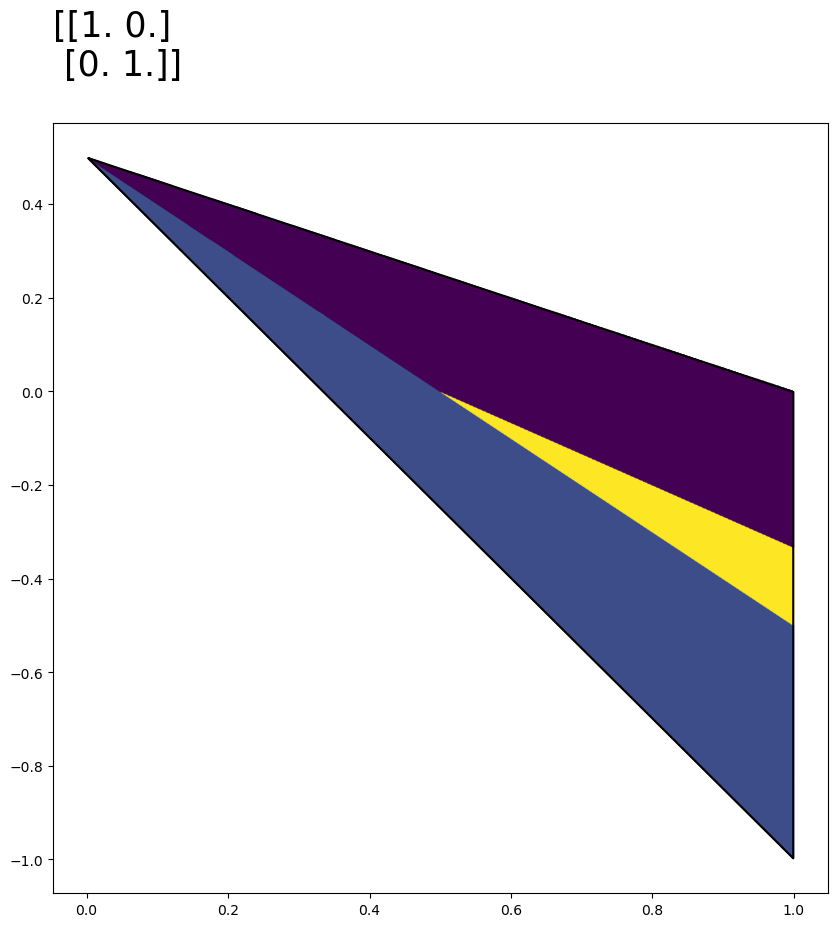

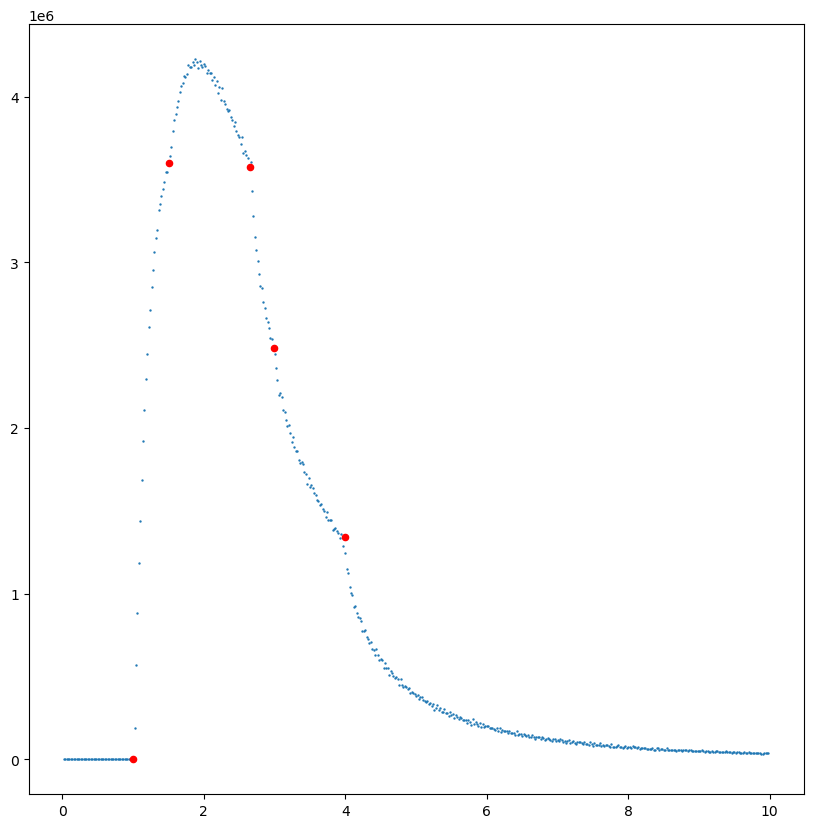

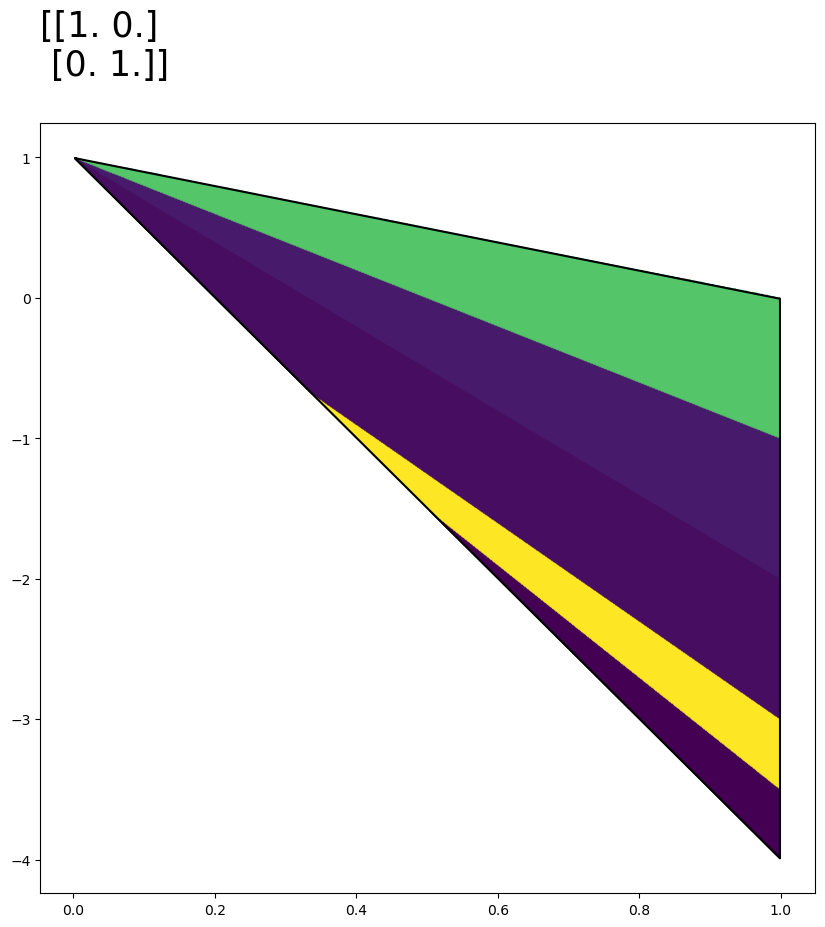

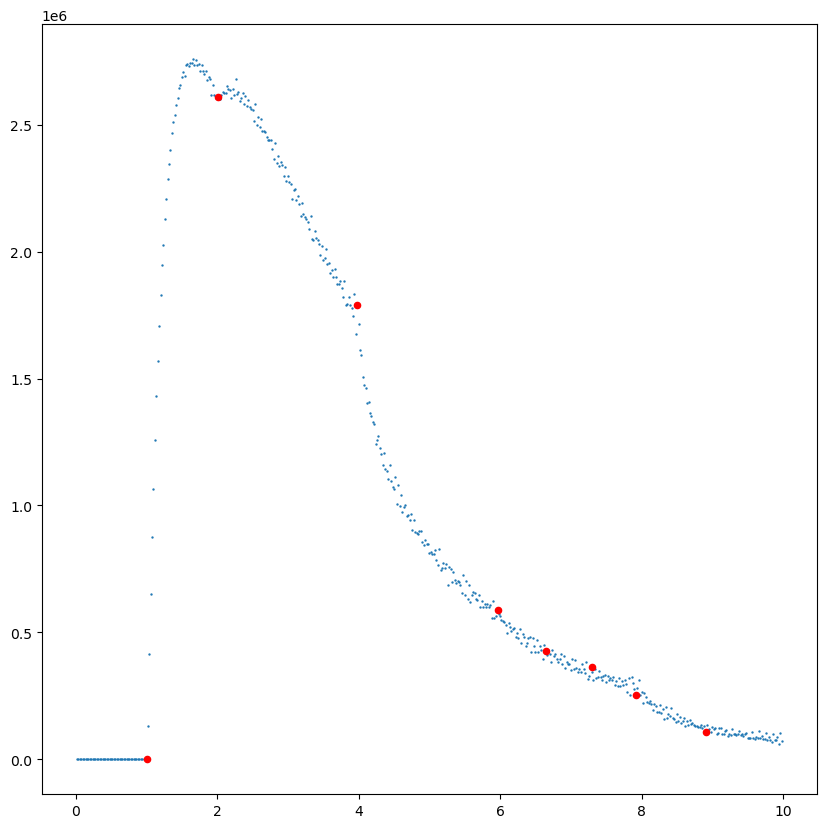

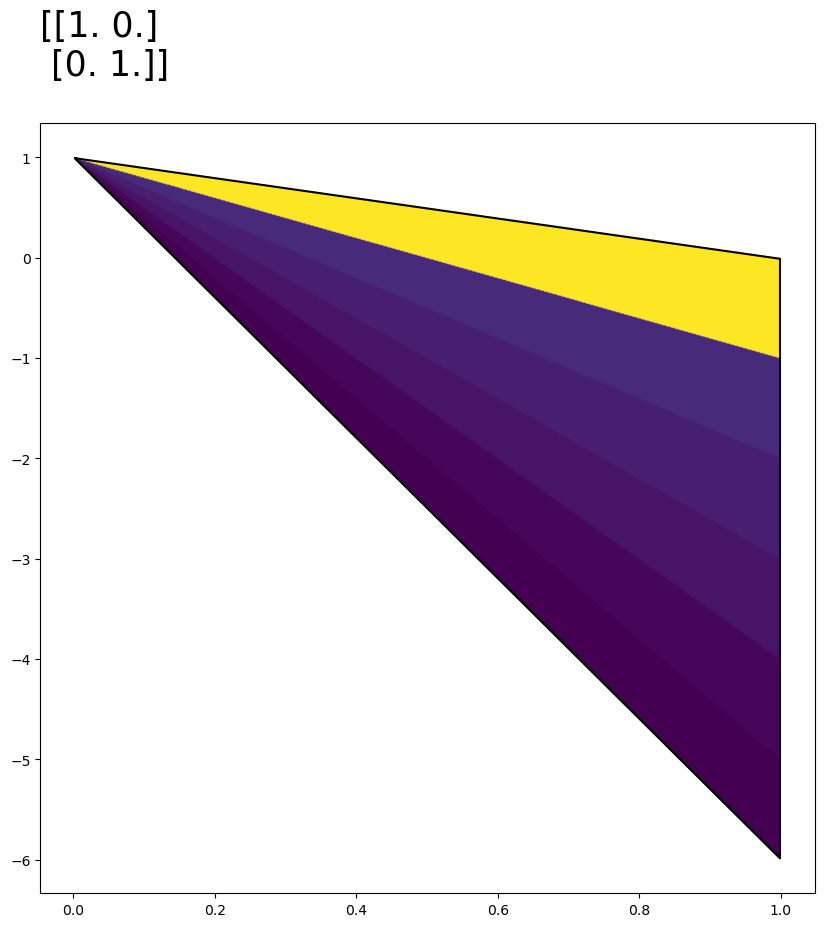

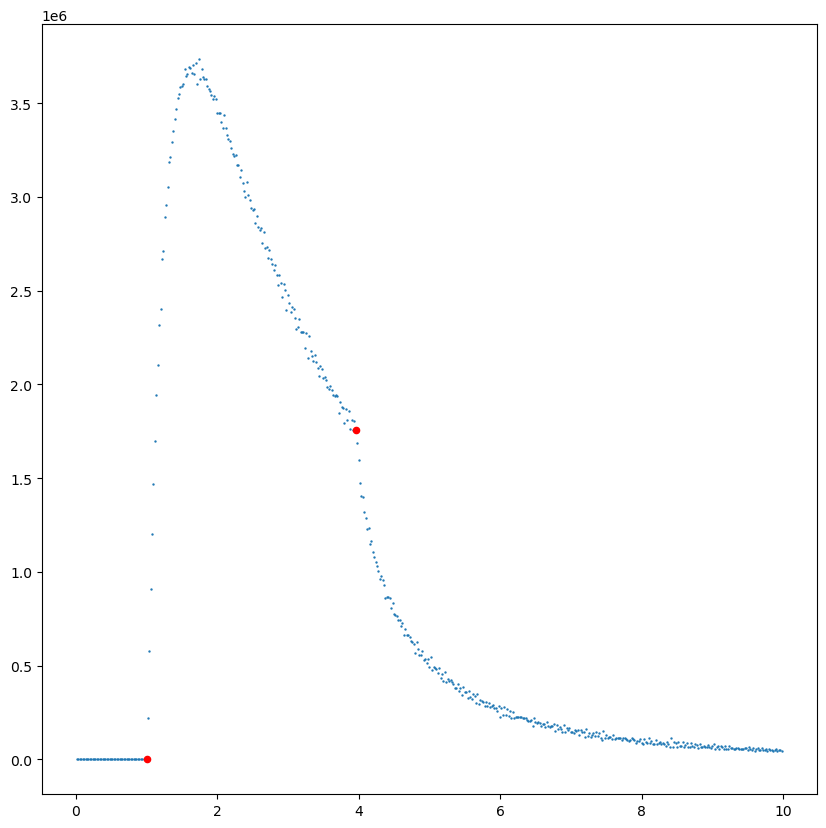

In [6]:
for i in range(len(permutations)):
    n_squares = 7
    perm = permutations[i]
    vecs = vectors(perm,2500)
    try:
        comp(perm, vecs, 7, i)
    except:
        continue

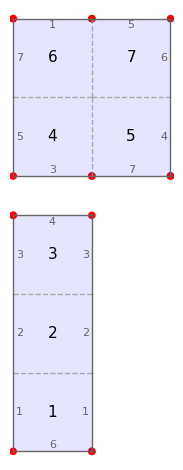

In [8]:
perm = permutations[3]
vecs0 = vectors(perm, 8000)
dx = 0.001
alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs = poincare_details(perm, vecs0)
perm.show()

In [9]:
alphas

[1.0, 9508.0, 104.0, 106.0, 1950.0, 663.0, 10.0, 120.0, 35.0, 119.0]

14442
124
[[1.0, 2.0], [2.0, 3.0], [2.0, 2.0]]


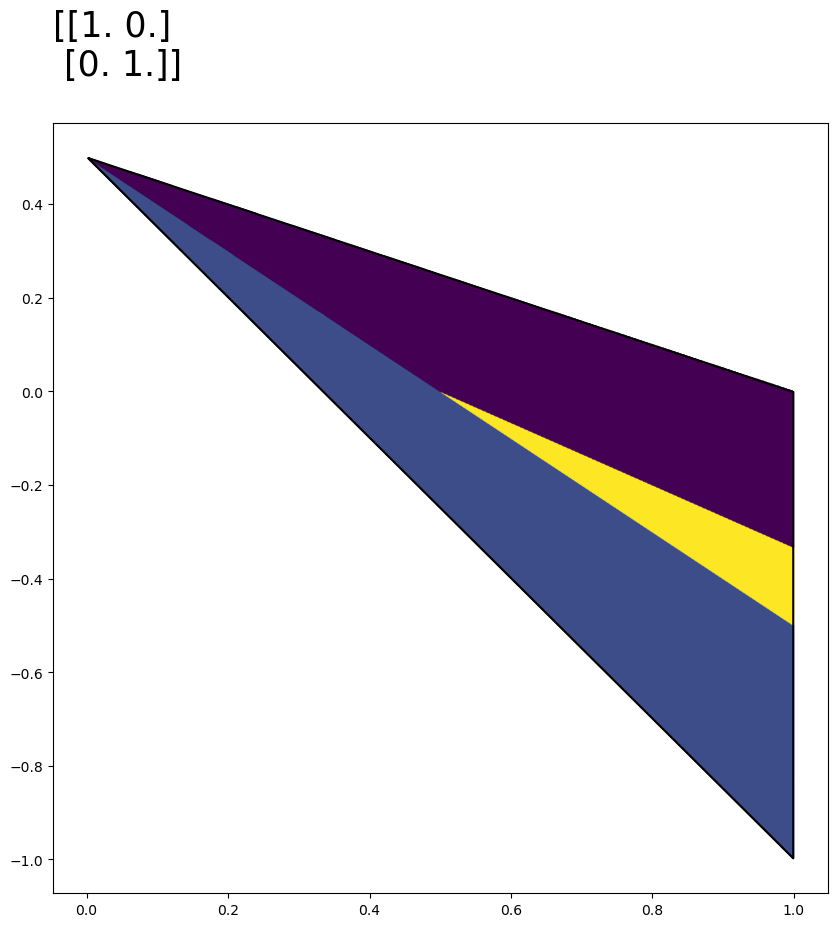

In [10]:
i = 0
n_squares = 7
index = 3
vecs, x_vals, m0, m1, x0, y0, dx_y = setup(alphas[i], Cs[i], eigs[i], vecs0, dx)
df = winners(vecs, x_vals, m0, m1, y0, dx, dx_y)
plot(df, vecs, Cs[i], 1, n_squares, index, test = True)

[2.005511733540216,
 7.96809336208139,
 2.0087675983980673,
 5.98501027280653,
 5.985041074692511,
 7.99624218853523,
 7.996246466762874,
 3.008286740213357,
 5.32800304958745,
 5.983602378361696,
 5.985001105364239,
 5.9865333920931585]

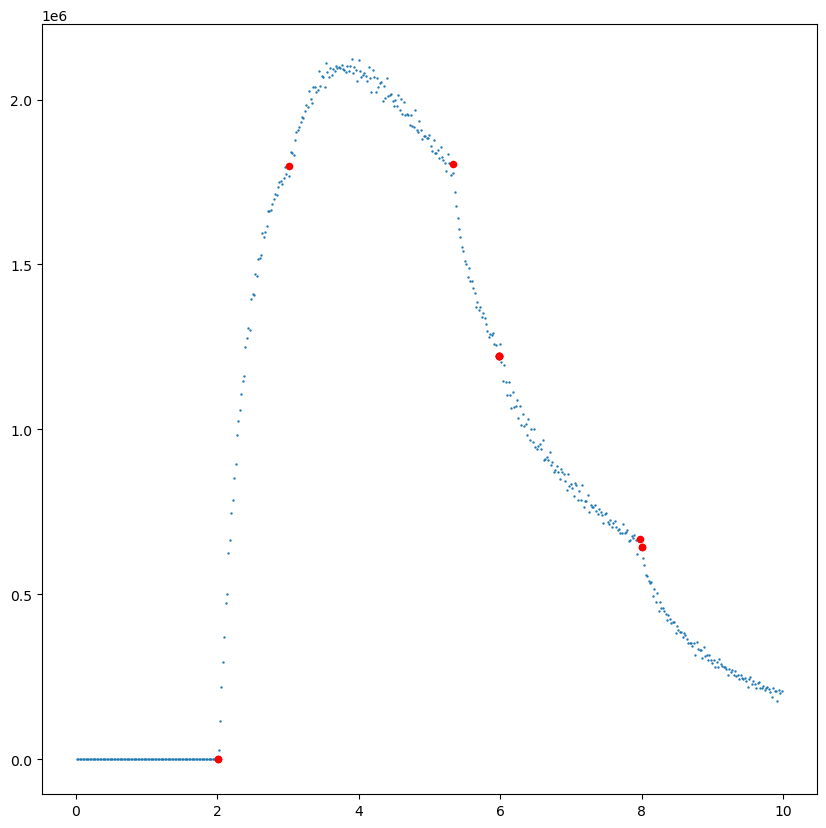

In [11]:
sec_list = sec_setup(df, dx_y)
secs = sec_comp(sec_list, dx)
times = time_comp(secs)
pdf(list(df["time"]), times, dx)
times

In [12]:
df

,x,y,lab,vec,time
0,0.003,0.4965,35,"[[2.0], [2.0]]",667.334001
1,0.003,0.4975,10,"[[1.0], [2.0]]",668.002672
2,0.004,0.4950,35,"[[2.0], [2.0]]",501.002004
3,0.004,0.4960,35,"[[2.0], [2.0]]",500.000000
4,0.004,0.4970,10,"[[1.0], [2.0]]",501.002004
...,...,...,...,...,...
497857,0.999,-0.0055,10,"[[1.0], [2.0]]",2.026318
497858,0.999,-0.0045,10,"[[1.0], [2.0]]",2.022224
497859,0.999,-0.0035,10,"[[1.0], [2.0]]",2.018147
497860,0.999,-0.0025,10,"[[1.0], [2.0]]",2.014087


In [2]:
S = SymmetricGroup(1)

In [3]:
type(S)

<class 'sage.groups.perm_gps.permgroup_named.SymmetricGroup_with_category'>

In [ ]:
#